## CANCER PREDICTION USING MACHINE LEARNING

Breast cancer is the most common cancer affecting women worldwide, and early diagnosis and treatment are crucial for improving patient outcomes. Despite significant advancements in medical research and technology, breast cancer remains a major public health concern. The aim of this open research approach is to understand pattern, transparency, innovation, and discoveries.

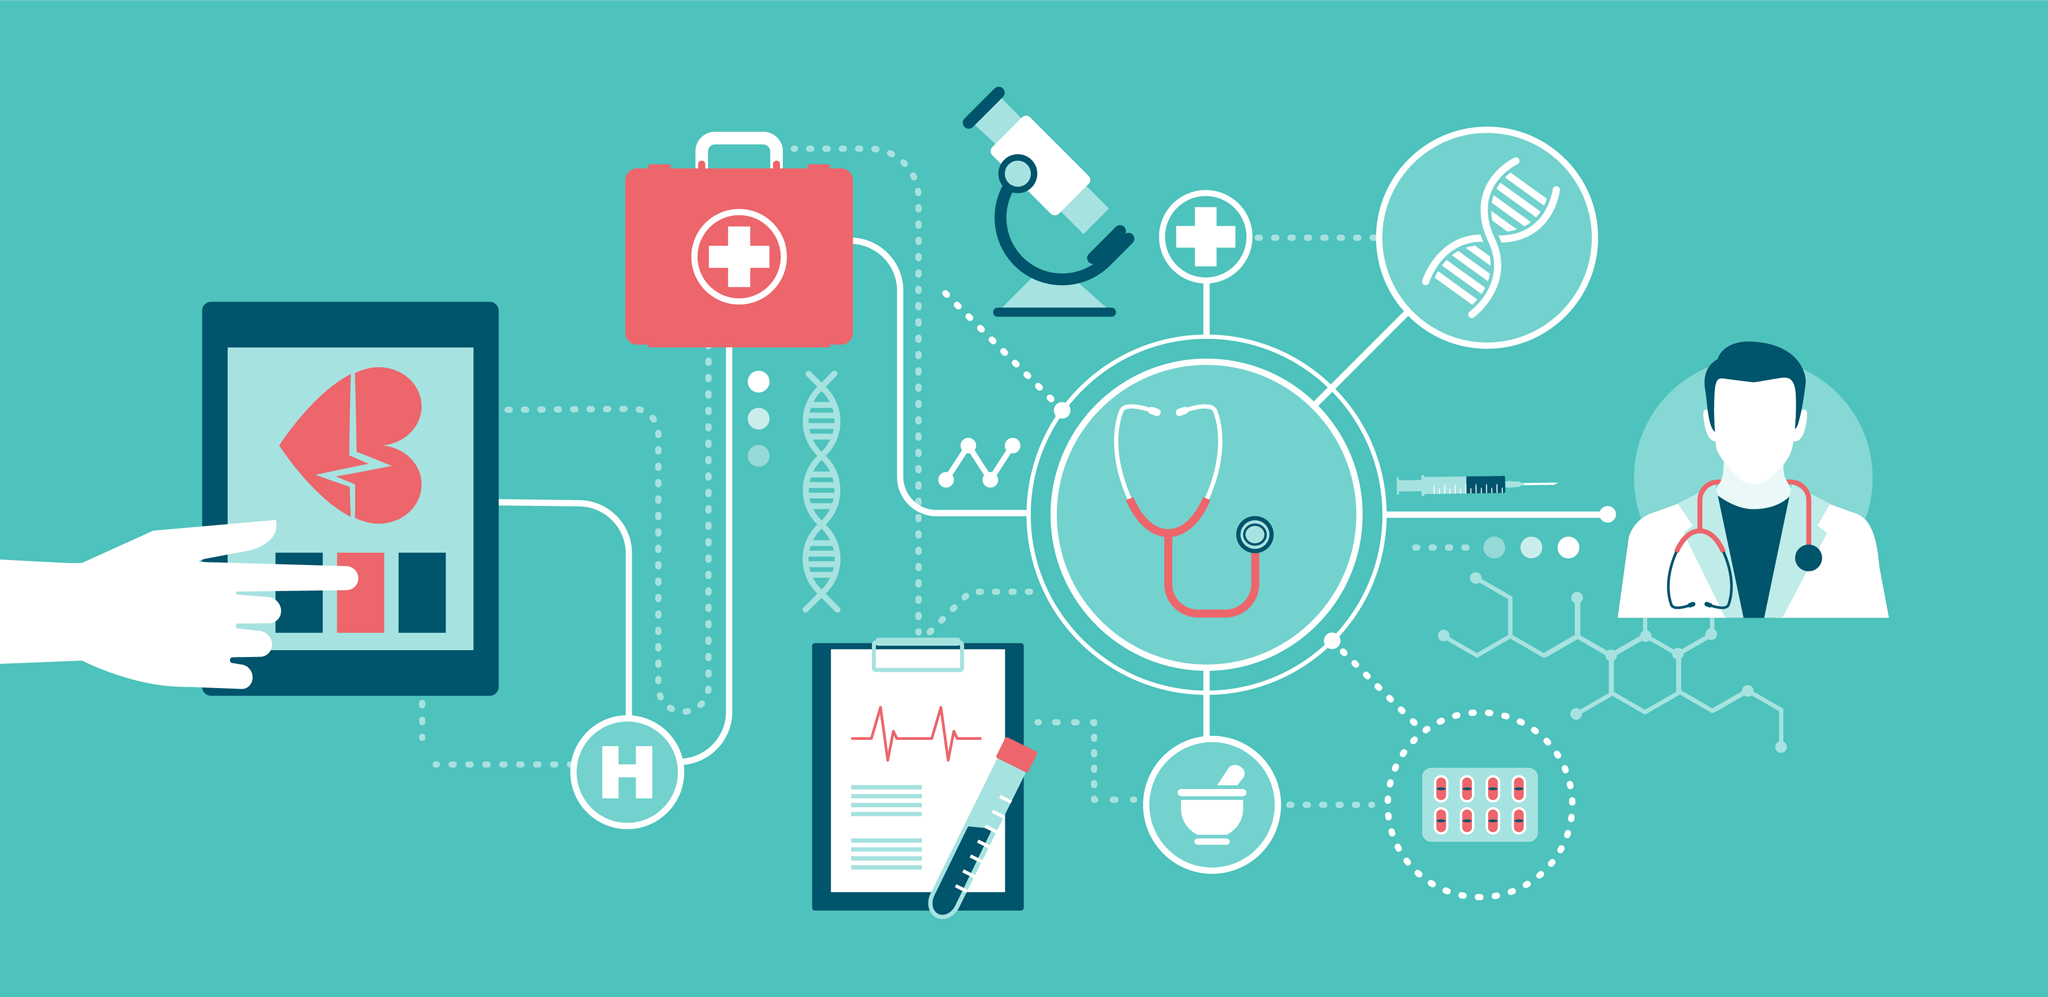

Hemant Thapa

### LIBRARIES

In [93]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost
import shap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import NMF
from sklearn.preprocessing import MinMaxScaler

### LOADING DATASET

In [94]:
# Load the dataset
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

In [95]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [96]:
df = pd.DataFrame(np.c_[data['data'], data['target']], columns=np.append(data['feature_names'], ['target']))

In [97]:
df.shape

(569, 31)

In [98]:
df[:5]

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


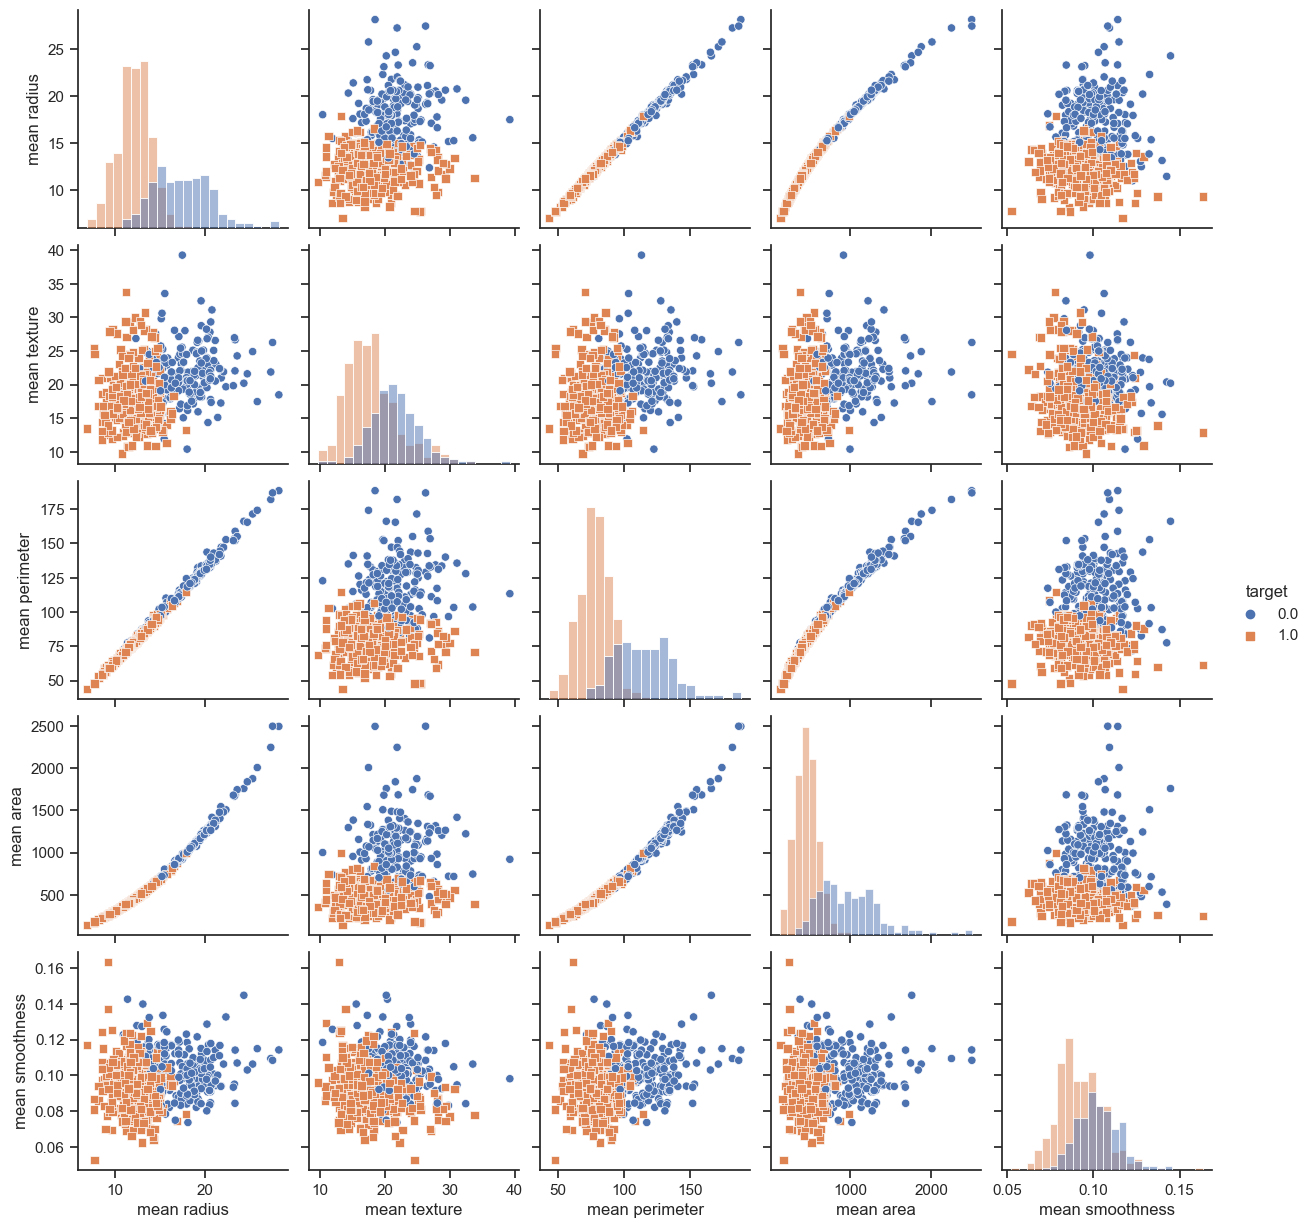

In [99]:
selected_features = ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'target']
df_subset = df[selected_features]

sns.set(style="ticks")
sns.pairplot(df_subset, hue="target", markers=["o", "s"], diag_kind="hist")
plt.show()

In [100]:
# Print unique values for each column
for column in df.columns:
    print(f"Unique values in column '{column}':\n{df[column].unique()}\n")


Unique values in column 'mean radius':
[17.99  20.57  19.69  11.42  20.29  12.45  18.25  13.71  13.    12.46
 16.02  15.78  19.17  15.85  13.73  14.54  14.68  16.13  19.81  13.54
 13.08   9.504 15.34  21.16  16.65  17.14  14.58  18.61  15.3   17.57
 18.63  11.84  17.02  19.27  16.74  14.25  13.03  14.99  13.48  13.44
 10.95  19.07  13.28  13.17  18.65   8.196 12.05  13.49  11.76  13.64
 11.94  18.22  15.1   11.52  19.21  14.71  13.05   8.618 10.17   8.598
  9.173 12.68  14.78   9.465 11.31   9.029 12.78  18.94   8.888 17.2
 13.8   12.31  16.07  13.53  18.05  20.18  12.86  11.45  13.34  25.22
 19.1   12.    18.46  14.48  19.02  12.36  14.64  14.62  15.37  13.27
 13.45  15.06  20.26  12.18   9.787 11.6   14.42  13.61   6.981  9.876
 10.49  13.11  11.64  22.27  11.34   9.777 12.63  14.26  10.51   8.726
 11.93   8.95  14.87  17.95  11.41  18.66  24.25  14.5   13.37  13.85
 19.    19.79  12.19  15.46  16.16  15.71  18.45  12.77  11.71  11.43
 14.95  11.28   9.738 16.11  12.9   10.75  11.9  

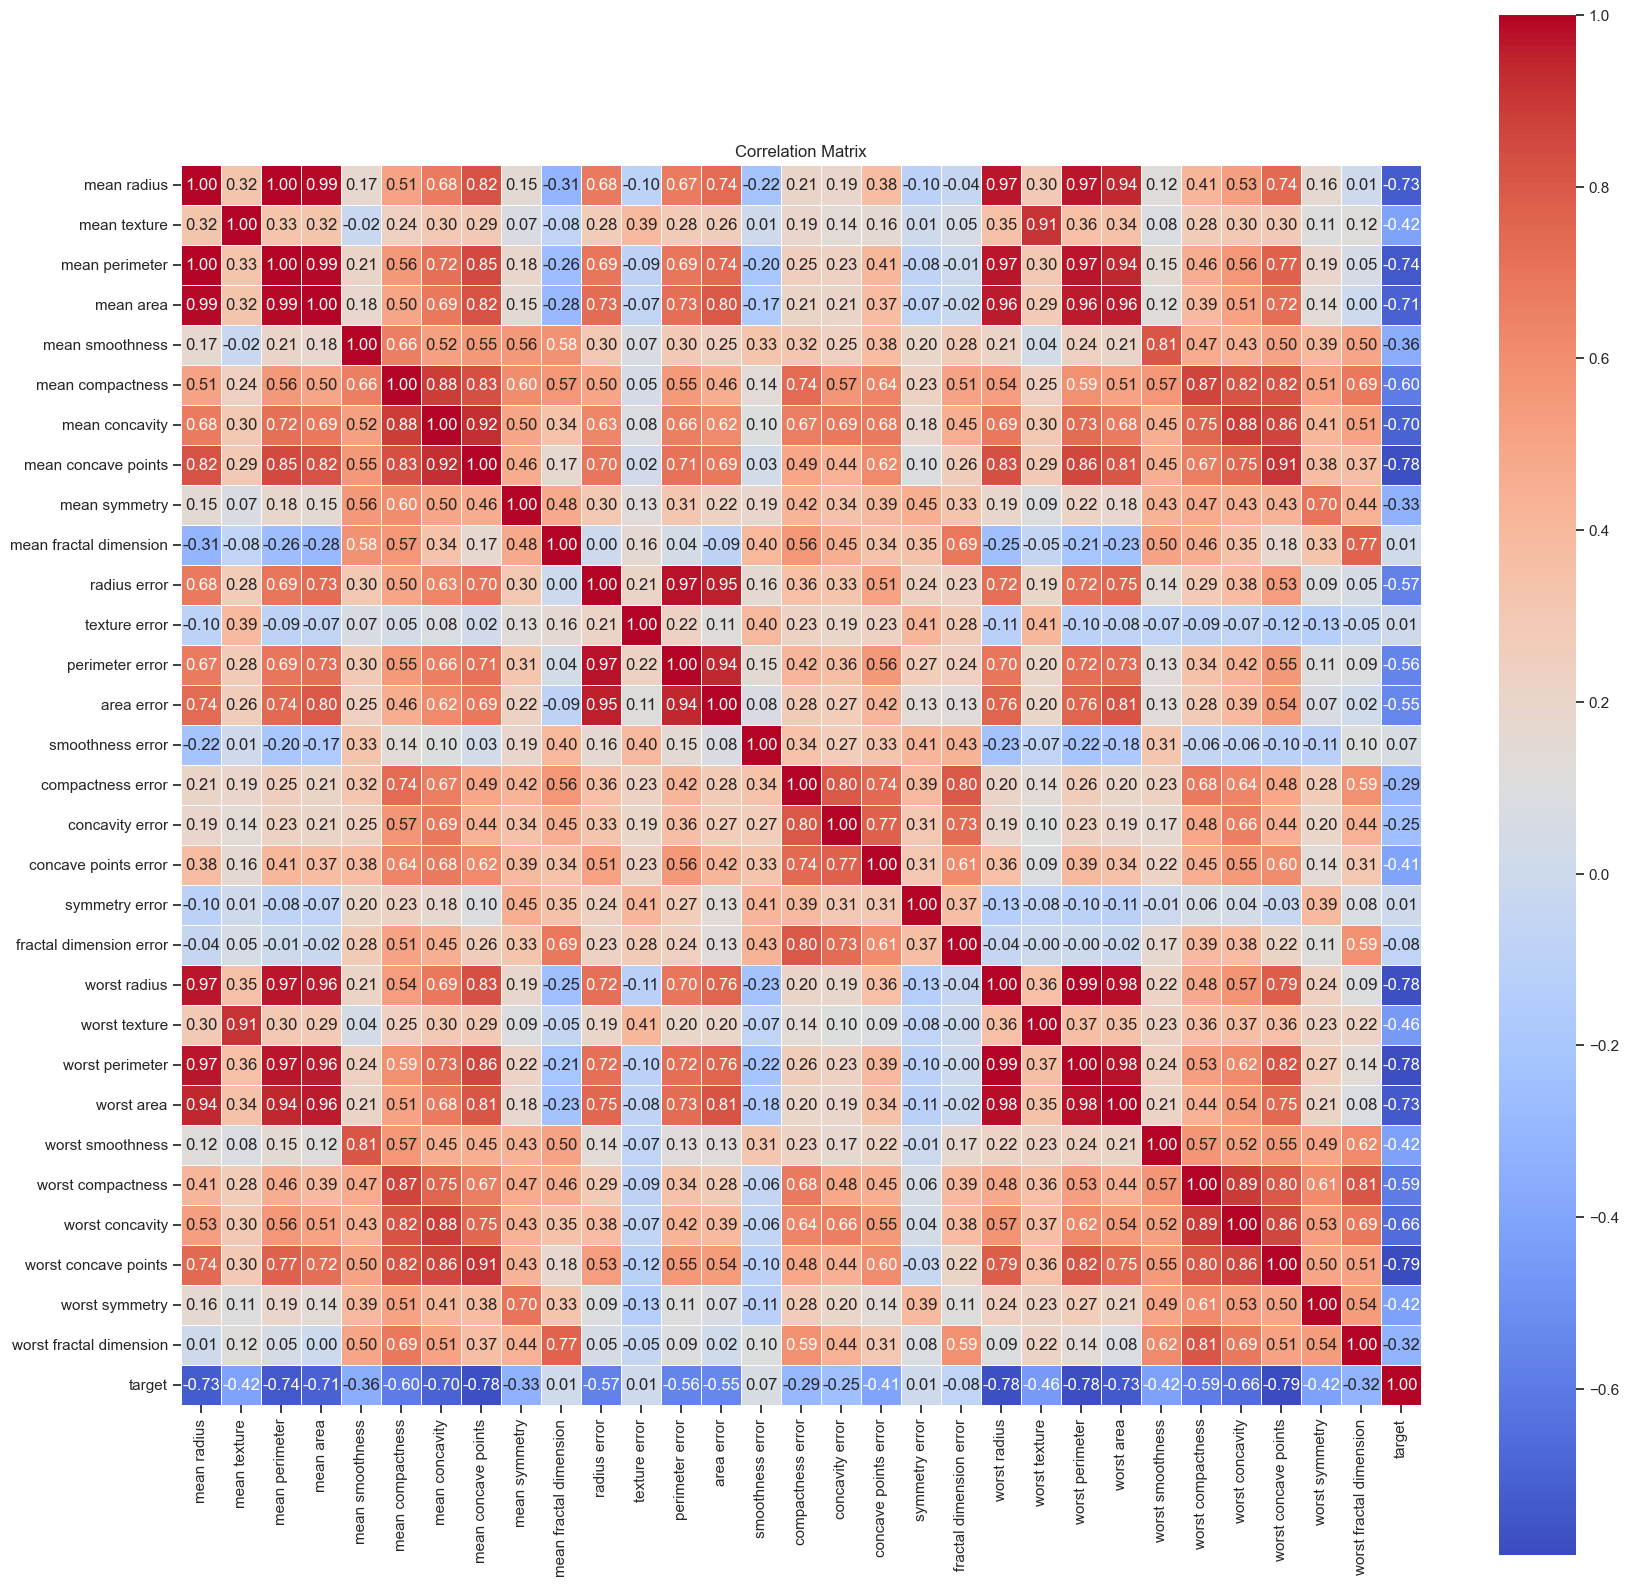

In [101]:
corr_matrix = df.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True, linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

In [102]:
# Split the dataset into training and testing sets
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=None)

In [104]:
# Scale the data
scaler = StandardScaler()
scaler

StandardScaler()

In [105]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [106]:
# Train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [107]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [108]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

In [109]:
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", report)

Accuracy: 1.0
Confusion Matrix:
 [[45  0]
 [ 0 69]]
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        45
         1.0       1.00      1.00      1.00        69

    accuracy                           1.00       114
   macro avg       1.00      1.00      1.00       114
weighted avg       1.00      1.00      1.00       114



The model's accuracy is approximately 97.37%

Precision: The proportion of true positive predictions out of all positive predictions made. For class 0 (benign), the precision is 0.98, and for class 1 (malignant), it is 0.97.

Recall: The proportion of true positive predictions out of all actual positive instances. For class 0 (benign), the recall is 0.95, and for class 1 (malignant), it is 0.99.

F1-score: The harmonic mean of precision and recall, providing a single score that balances both metrics. For class 0 (benign), the F1-score is 0.96, and for class 1 (malignant), it is 0.98.

The report also provides averages for the metrics:
Macro average: The average of the metric for each class, without considering class imbalance.

Weighted average: The average of the metric for each class, weighted by the number of samples in each class.

In [110]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, :-1], df['target'], test_size=0.3, random_state=None)

In [111]:
clf = LogisticRegression(max_iter=10000)
clf.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

Accuracy: 0.9707602339181286
Confusion Matrix:
 [[ 62   4]
 [  1 104]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.98      0.94      0.96        66
         1.0       0.96      0.99      0.98       105

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171



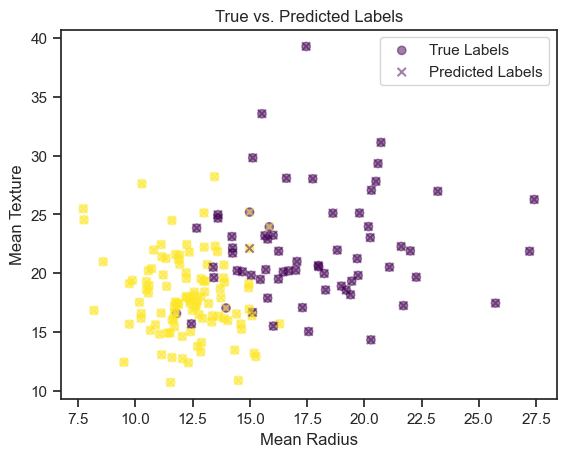

In [112]:
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", report)
plt.scatter(X_test['mean radius'], X_test['mean texture'], c=y_test, cmap='viridis', marker='o', label='True Labels', alpha=0.5)
plt.scatter(X_test['mean radius'], X_test['mean texture'], c=y_pred, cmap='viridis', marker='x', label='Predicted Labels', alpha=0.5)
plt.legend()
plt.xlabel('Mean Radius')
plt.ylabel('Mean Texture')
plt.title('True vs. Predicted Labels')
plt.show()

The scatter plot comparing the true labels vs. predicted labels for mean radius and mean texture features are provided a visual representation of how well the trained model is making predictions on the test dataset. The graph helps to identify the areas where the model performs well and where it might struggle.

true labels are represented by circular markers and predicted labels by cross markers. If the model is making accurate predictions, the circular markers and cross markers should mostly overlap.

Keep in mind that the example only used the first two features mean radius and mean texture for visualization purposes. In reality, the dataset has multiple features, and the model uses all of them for making predictions. The graph may not reflect the complete picture of the model's performance, but it give some insights into the relationships between a subset of features and the target variable. To better understand the overall performance of our model, we have also used other evaluation metrics such as accuracy, precision, recall, and F1-score.

In [126]:
# Scale the data to the range [0, 1] using MinMaxScaler
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df.iloc[:, :-1])
scaled_data[:5]

array([[0.52103744, 0.0226581 , 0.54598853, 0.36373277, 0.59375282,
        0.7920373 , 0.70313964, 0.73111332, 0.68636364, 0.60551811,
        0.35614702, 0.12046941, 0.3690336 , 0.27381126, 0.15929565,
        0.35139844, 0.13568182, 0.30062512, 0.31164518, 0.18304244,
        0.62077552, 0.14152452, 0.66831017, 0.45069799, 0.60113584,
        0.61929156, 0.56861022, 0.91202749, 0.59846245, 0.41886396],
       [0.64314449, 0.27257355, 0.61578329, 0.50159067, 0.28987993,
        0.18176799, 0.20360825, 0.34875746, 0.37979798, 0.14132266,
        0.15643672, 0.08258929, 0.12444047, 0.12565979, 0.11938675,
        0.08132304, 0.0469697 , 0.25383595, 0.08453875, 0.0911101 ,
        0.60690146, 0.30357143, 0.53981772, 0.43521431, 0.34755332,
        0.15456336, 0.19297125, 0.63917526, 0.23358959, 0.22287813],
       [0.60149557, 0.3902604 , 0.59574321, 0.44941676, 0.51430893,
        0.4310165 , 0.46251172, 0.63568588, 0.50959596, 0.21124684,
        0.22962158, 0.09430251, 0.18037035, 0.

In [114]:
# Applying NMF
n_latent_factors = 2
model = NMF(n_components=n_latent_factors, init='random', random_state=42)
latent_factors = model.fit_transform(scaled_data)
latent_factors[:5]

array([[0.77403916, 0.56176992],
       [0.68900421, 0.12996771],
       [0.74713359, 0.36561668],
       [0.26428429, 1.27177524],
       [0.68882857, 0.20822764]])

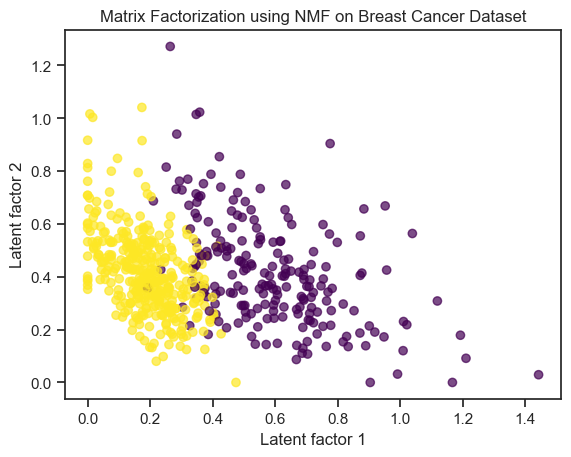

In [115]:
plt.scatter(latent_factors[:, 0], latent_factors[:, 1], c=df['target'], cmap='viridis', alpha=0.7)
plt.xlabel('Latent factor 1')
plt.ylabel('Latent factor 2')
plt.title('Matrix Factorization using NMF on Breast Cancer Dataset')
plt.show()

In [119]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, :-1], df['target'], test_size=0.2, random_state=None)

In [122]:
model = xgboost.train({"learning_rate": 0.01}, xgboost.DMatrix(X_train, label=y_train), 100)

In [123]:
#predictions using SHAP values
explainer = shap.Explainer(model)
shap_values = explainer(X_test)

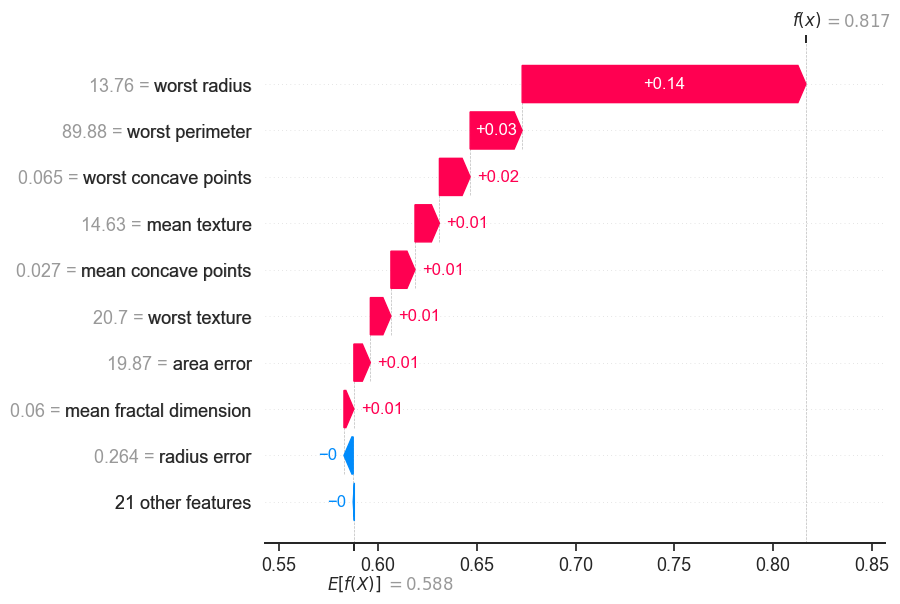

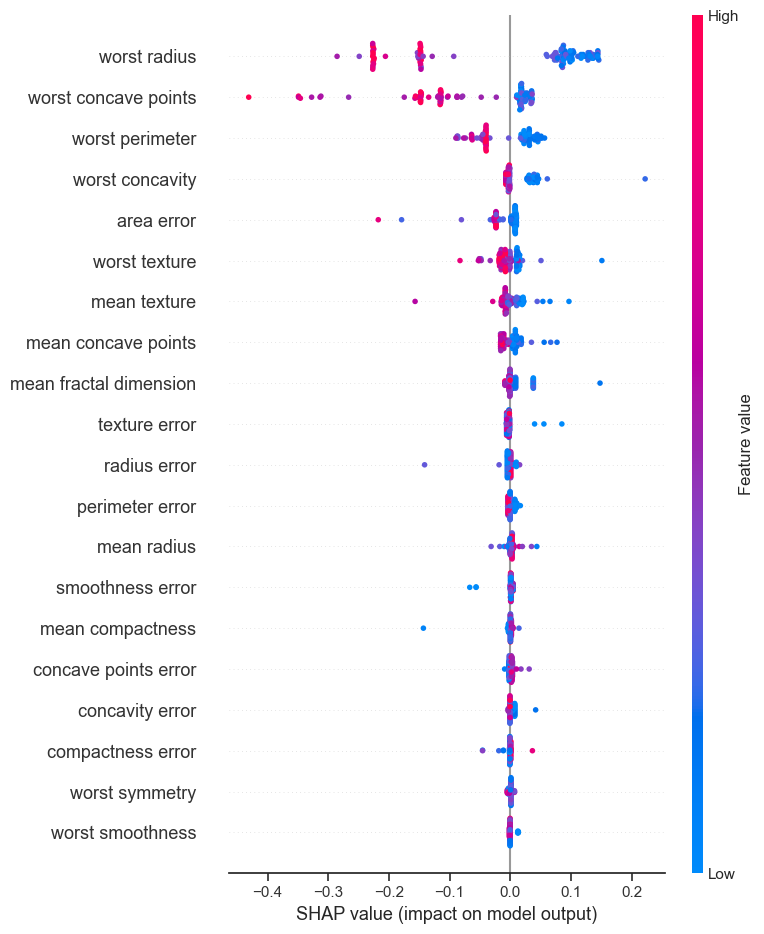

In [125]:
#SHAP values for a single prediction
shap.plots.waterfall(shap_values[0])
shap.summary_plot(shap_values, X_test)